In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

In [2]:
#load data
bdf = np.loadtxt("oxygenation_b.csv", delimiter=",")
wdf = np.loadtxt("oxygenation_w.csv", delimiter=",")

In [3]:
#calculate black error rates for 91.5
BFA = 0
BFN = 0
BCD = 0
BTN = 0
for i in bdf:
    if i[0] < 91.5:
        if i[1]  < 88:
            BCD += 1
        else:
            BFA += 1
    else:
        if i[1] < 88:
            BFN += 1
        else:
            BTN += 1

BHP = BCD + BFN
BNU = BFA + BTN

FA_b = BFA/BNU
CD_b = BCD/BHP

print("black false alarm %: ", FA_b)
print("black correct detection %: ", CD_b)

black false alarm %:  0.08284883720930232
black correct detection %:  0.3854166666666667


In [4]:
#calculate white error rates for 91.5
WFA = 0
WFN = 0
WCD = 0
WTN = 0
for i in wdf:
    if i[0] < 91.5:
        if i[1]  < 88:
            WCD += 1
        else:
            WFA += 1
    else:
        if i[1] < 88:
            WFN += 1
        else:
            WTN += 1

WHP = WCD + WFN
WNU = WFA + WTN

FA_w = WFA/WNU
CD_w = WCD/WHP

print("white false alarm %: ", FA_w)
print("white correct detection %: ", CD_w)

white false alarm %:  0.118190822053483
white correct detection %:  0.572


In [5]:
#calculate all error rates for 91.5
THP = BHP + WHP
TNU = BNU + WNU
TFA = BFA + WFA
TCD = BCD + WCD

FA_all = TFA/TNU
CD_all = TCD/THP

print("total false alarm %: ", FA_all)
print("total correct detection %: ", CD_all)

total false alarm %:  0.11164917944578961
total correct detection %:  0.49095022624434387


In [6]:
#calculate error rates for all thresholds 
threshold_list = [88.5, 89.5, 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5]

p_FA_w = []
p_CD_w = []
p_FA_b = []
p_CD_b = []
p_FA_all = []
p_CD_all = []

for j, threshold in enumerate(threshold_list):
    #white
    WFA = 0
    WFN = 0
    WCD = 0
    WTN = 0
    for i in wdf:
        if i[0] < threshold:
            if i[1]  < 88:
                WCD += 1
            else:
                WFA += 1
        else:
            if i[1] < 88:
                WFN += 1
            else:
                WTN += 1

    WHP = WCD + WFN
    WNU = WFA + WTN

    p_FA_w.append( WFA/WNU)
    p_CD_w.append(WCD/WHP)

    #black
    BFA = 0
    BFN = 0
    BCD = 0
    BTN = 0
    for i in bdf:
        if i[0] < threshold:
            if i[1]  < 88:
                BCD += 1
            else:
                BFA += 1
        else:
            if i[1] < 88:
                BFN += 1
            else:
                BTN += 1

    BHP = BCD + BFN
    BNU = BFA + BTN

    p_FA_b.append(BFA/BNU)
    p_CD_b.append(BCD/BHP)

    #total
    THP = BHP + WHP
    TNU = BNU + WNU
    TFA = BFA + WFA
    TCD = BCD + WCD

    p_FA_all.append(TFA/TNU) 
    p_CD_all.append(TCD/THP) 


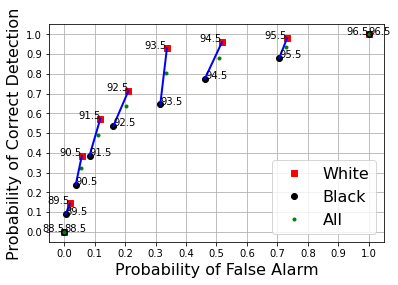

In [7]:
# Plot the results
plt.figure(1)
plt.plot(p_FA_w, p_CD_w, 'rs', label="White", linewidth=2)
plt.plot(p_FA_b, p_CD_b, 'ko', label="Black", linewidth=2)
plt.plot(p_FA_all, p_CD_all, 'g.', label="All", linewidth=2)
plt.grid('on')
plt.xlabel('Probability of False Alarm', fontsize=16)
plt.ylabel('Probability of Correct Detection', fontsize=16)
plt.xticks(np.arange(0, 1.01, 0.1)) 
plt.yticks(np.arange(0, 1.01, 0.1))
plt.legend(fontsize=16)
for i, threshold in enumerate(threshold_list):

    # Put the threshold on each dot, connect the white/Black points for 
    # that correspond to the same threshold.
    plt.text(p_FA_w[i], p_CD_w[i], str(threshold), horizontalalignment='right')
    plt.text(p_FA_b[i], p_CD_b[i], str(threshold), horizontalalignment='left')
    plt.plot([p_FA_b[i],p_FA_w[i]], [p_CD_b[i],p_CD_w[i]], 'b-', linewidth=2)

In [8]:
#calculate combined errors
ones = np.ones(9)
lessthan = ones - p_CD_all
sums = lessthan + p_FA_all
print(sums)
lessthanw = ones - p_CD_w
sumsw = lessthanw + p_FA_w
print(sumsw)
lessthanb = ones - p_CD_b
sumsb = lessthanb + p_FA_b
print(sumsb)

[1.         0.89596351 0.73253987 0.62069895 0.56549095 0.52763443
 0.62757698 0.79054777 1.        ]
[1.         0.87448795 0.6734447  0.54619082 0.49830043 0.40907494
 0.55799274 0.75192473 1.        ]
[1.         0.9158188  0.79820736 0.69743217 0.62487888 0.66957364
 0.68616764 0.82618702 1.        ]


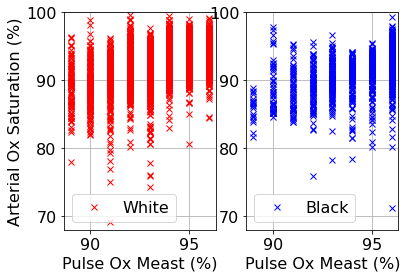

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# These are commands I always use to format plots to have a larger font size and
# to refresh automatically as they're changed.
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.ion()


# Our two hypotheses:
# H0: the "normal"
#     Arterial Oxygen Saturation is >= 88.0
# H1: the "abnormal", what we want to be alarmed about
#     Arterial Oxygen Saturation is < 88.0

# Load data: There are two files separated by race.
# I use _w and _b for the white and Black patient data, respectively
data_w = np.loadtxt("oxygenation_w.csv", delimiter=', ', comments='#')
data_b = np.loadtxt("oxygenation_b.csv", delimiter=', ', comments='#')

# The 0th column is the pulse ox value.
# The 1st column is the arterial oxygen saturation.  
#   We take the arterial Ox Sat as the "truth" because it is the "gold standard"
#   for monitoring of oxygen saturation in the blood.
# Each row is one patient.  
pulseOx_w = data_w[:,0]
arterOx_w = data_w[:,1]
pulseOx_b = data_b[:,0]
arterOx_b = data_b[:,1]

# Plot the data
plt.figure(1)
plt.clf()
plt.subplot(1,2,1)  # Subplot with 1 row, 2 columns, currently plotting into #1.
plt.plot(pulseOx_w, arterOx_w, 'rx', label="White", linewidth=2)
plt.grid('on')
plt.ylim([68,100])  # Have a uniform y limits for both subplots.
plt.xlabel('Pulse Ox Meast (%)', fontsize=16)
plt.ylabel('Arterial Ox Saturation (%)', fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)  # Subplot with 1 row, 2 columns, currently plotting into #2.
plt.plot(pulseOx_b, arterOx_b, 'bx', label="Black", linewidth=2)
plt.xlabel('Pulse Ox Meast (%)', fontsize=16)
plt.grid('on')
plt.ylim([68,100])  # Have a uniform y limits for both subplots.
plt.legend(fontsize=16)